# **Intel vs Amd Social Network Analysis**
## Finding the Most Influential Users


**AFEEF RADITHYA RASHID-1305213036**

**MUHAMMAD ZACKY AL GIFFARI-1305213015**

# Librairies and Dataset

In [ ]:
#Import Necessary Libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import and Read Datasets
df = pd.read_csv('https://raw.githubusercontent.com/Prenagen24/Intel-vs-Amd-Social-Network-Analysis/main/IntelAmdComments.csv')
df

,id,date,author,text,type,author_channel_url,author_channel_id,edited_date,parent_post_id,parent_username,direct_reply_to,likes
0,Ugwix16XPDiouG-kGcB4AaABAg,2023-10-07T11:09:28Z,Virtuality1,brokeass me watching two millionares playing o...,Thread,http://www.youtube.com/channel/UCY-KGGS4DXrrNH...,UCY-KGGS4DXrrNHzkfaH_1Og,2023-10-07T11:09:28Z,NaN,NaN,NaN,0
1,Ugy7gZzYb0lWuxB50dF4AaABAg,2023-10-07T04:22:57Z,T0rr,7:54 \nThat slam hurt my soul... right onto th...,Thread,http://www.youtube.com/channel/UCkMKzovu1gwCqt...,UCkMKzovu1gwCqtnJv_pzM8w,2023-10-07T04:22:57Z,NaN,NaN,NaN,0
2,UgwwqY4Pt012ens9Dgl4AaABAg,2023-10-06T18:25:04Z,Walker Hensley,10 months later the 7950x3d is 130$ cheaper th...,Thread,http://www.youtube.com/channel/UCRJ90ehl_r_lec...,UCRJ90ehl_r_lecc9WVIUTbQ,2023-10-06T18:25:04Z,NaN,NaN,NaN,0
3,UgyDHji0nqODI8LziV14AaABAg,2023-10-06T18:21:38Z,Walker Hensley,"""the next time i walk up to a computer and onl...",Thread,http://www.youtube.com/channel/UCRJ90ehl_r_lec...,UCRJ90ehl_r_lecc9WVIUTbQ,2023-10-06T18:21:38Z,NaN,NaN,NaN,0
4,UgxrQLaaJrW5kubSfBp4AaABAg,2023-10-05T14:13:14Z,Sujay Roy,How to play games without cpu and gpu,Thread,http://www.youtube.com/channel/UCLEWAL8bB_5PJr...,UCLEWAL8bB_5PJrlJ6AutMZg,2023-10-05T14:13:14Z,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4951,9imchf5QGXi9imjWXGISl2,2022-11-23T19:59:52Z,SterkeYerke,You've got a lot more variables when comparing...,Reply,http://www.youtube.com/channel/UCetzS-KtUt_Ch2...,UCetzS-KtUt_Ch2EzN385KDw,2022-11-23T20:01:42Z,UgyRTQj7MlsYGDdoBQ54AaABAg,Retro Skaff,NaN,2
4952,9imchf5QGXi9imfUcg-jpC,2022-11-23T19:24:39Z,NotARandom,MSI Afterburner: am I a joke to you?,Reply,http://www.youtube.com/channel/UCoISVaUjiwR0AC...,UCoISVaUjiwR0ACR8ahc_UmA,2022-11-23T19:24:39Z,UgyRTQj7MlsYGDdoBQ54AaABAg,Retro Skaff,NaN,2
4953,9imchf5QGXi9imf8S8SHix,2022-11-23T19:21:38Z,ライカントッス,"Or you know, just open the game's installation...",Reply,http://www.youtube.com/channel/UC9h_EfGgkATT_6...,UC9h_EfGgkATT_62IekKXGNw,2022-11-23T19:21:38Z,UgyRTQj7MlsYGDdoBQ54AaABAg,Retro Skaff,NaN,2
4954,9imchf5QGXi9imf7ziejoT,2022-11-23T19:21:34Z,Kian Grey,The dream is everything runs on Vulkan,Reply,http://www.youtube.com/channel/UCv_zM1UAt0CfTE...,UCv_zM1UAt0CfTEw8vMHSq_g,2022-11-23T19:21:34Z,UgyRTQj7MlsYGDdoBQ54AaABAg,Retro Skaff,NaN,5


# EDA and Preprocess

In [ ]:
#Read Datasets Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4956 non-null   object
 1   date                4956 non-null   object
 2   author              4956 non-null   object
 3   text                4956 non-null   object
 4   type                4956 non-null   object
 5   author_channel_url  4956 non-null   object
 6   author_channel_id   4956 non-null   object
 7   edited_date         4956 non-null   object
 8   parent_post_id      1397 non-null   object
 9   parent_username     1397 non-null   object
 10  direct_reply_to     617 non-null    object
 11  likes               4956 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 464.8+ KB


There are several columns that contains missing value. Since we're not going to use all those columns, it would be easier if we select all the columns we needed first, then we handle the missing values.

In [ ]:
#Feature Engineering
dfCopy = df[['author', 'type', 'parent_username','direct_reply_to']]
dfCopy

,author,type,parent_username,direct_reply_to
0,Virtuality1,Thread,NaN,NaN
1,T0rr,Thread,NaN,NaN
2,Walker Hensley,Thread,NaN,NaN
3,Walker Hensley,Thread,NaN,NaN
4,Sujay Roy,Thread,NaN,NaN
...,...,...,...,...
4951,SterkeYerke,Reply,Retro Skaff,NaN
4952,NotARandom,Reply,Retro Skaff,NaN
4953,ライカントッス,Reply,Retro Skaff,NaN
4954,Kian Grey,Reply,Retro Skaff,NaN


We will fill the missing values with empty strings since the type of data inside of those columns are objects.

In [ ]:
#Fill NaN with Empty String
dfCopy['parent_username'].fillna("",inplace=True)
dfCopy['direct_reply_to'].fillna("",inplace=True)
dfCopy

<ipython-input-5-e11d1276cb5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy['parent_username'].fillna("",inplace=True)
<ipython-input-5-e11d1276cb5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCopy['direct_reply_to'].fillna("",inplace=True)


,author,type,parent_username,direct_reply_to
0,Virtuality1,Thread,,
1,T0rr,Thread,,
2,Walker Hensley,Thread,,
3,Walker Hensley,Thread,,
4,Sujay Roy,Thread,,
...,...,...,...,...
4951,SterkeYerke,Reply,Retro Skaff,
4952,NotARandom,Reply,Retro Skaff,
4953,ライカントッス,Reply,Retro Skaff,
4954,Kian Grey,Reply,Retro Skaff,


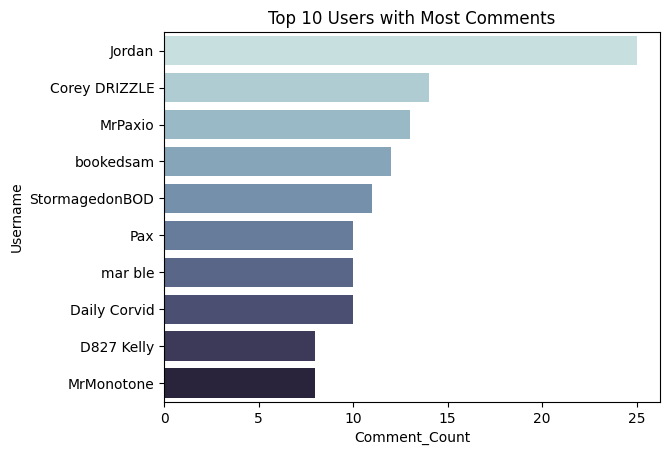

In [ ]:
#Top 10 Users with Most Comments
userCnt = dfCopy['author'].value_counts().reset_index().head(10)
userCnt.columns = ['Username', 'Comment_Count']

sns.barplot(y='Username', x='Comment_Count',data=userCnt,orient='h',palette="ch:start=.2,rot=-.3").set(title='Top 10 Users with Most Comments')
plt.show()

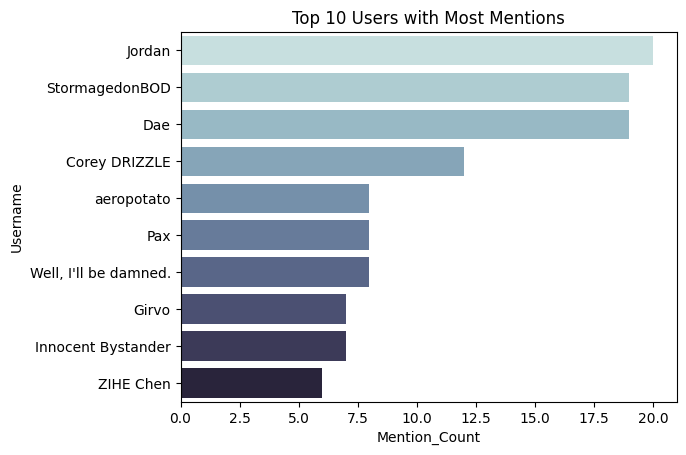

In [ ]:
#Top 10 Users with Most Mentions
menCnt = df['direct_reply_to'].dropna()
menCnt = menCnt.value_counts().reset_index().head(10)
menCnt.columns = ['Username', 'Mention_Count']

sns.barplot(y='Username', x='Mention_Count',data=menCnt,orient='h',palette="ch:start=.2,rot=-.3").set(title='Top 10 Users with Most Mentions')
plt.show()

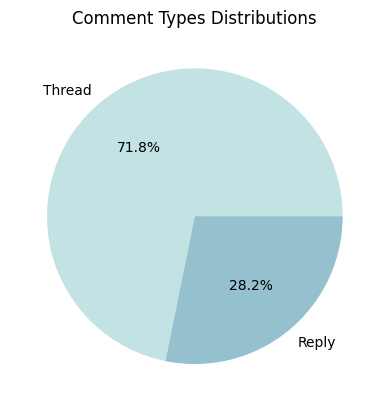

In [ ]:
#Pie Chart of Comments Types Distrbutions
typeCnt = dfCopy['type'].value_counts().reset_index()
typeCnt.columns = ['Type', 'Type_Count']

palette = sns.color_palette("ch:start=.2,rot=-.3")
fig, ax = plt.subplots()
ax.pie(typeCnt['Type_Count'], labels=typeCnt['Type'], autopct='%1.1f%%',colors=palette)
ax.set_title("Comment Types Distributions")
plt.show()

From these EDA, without the help of centrality calculations we might've guess that Jordan would be the most influential user since he tops both the charts above. But will he be the most influetial users with the centrality calculation?

# Social Network Graph

In [ ]:
#Initiate Social Network Graph
G=nx.Graph()

In [ ]:
#Add Nodes and Edges to the Graph

#Every Users become Node
autUn = dfCopy['author'].unique()
for i in autUn:
    G.add_node(i)

#Adding Edges for Comments with Direct Reply
dfReply = dfCopy.query('type== "Reply"')
for i in dfReply.index:
    G.add_edge(dfReply['direct_reply_to'][i],df['author'][i])

#Adding Edges for Comment without Direct Reply (Comments that are targeted towards the parent username)
dfReply = dfCopy.query('type== "Reply" and direct_reply_to==""')
for i in dfReply.index:
    G.add_edge(dfReply['parent_username'][i],df['author'][i])


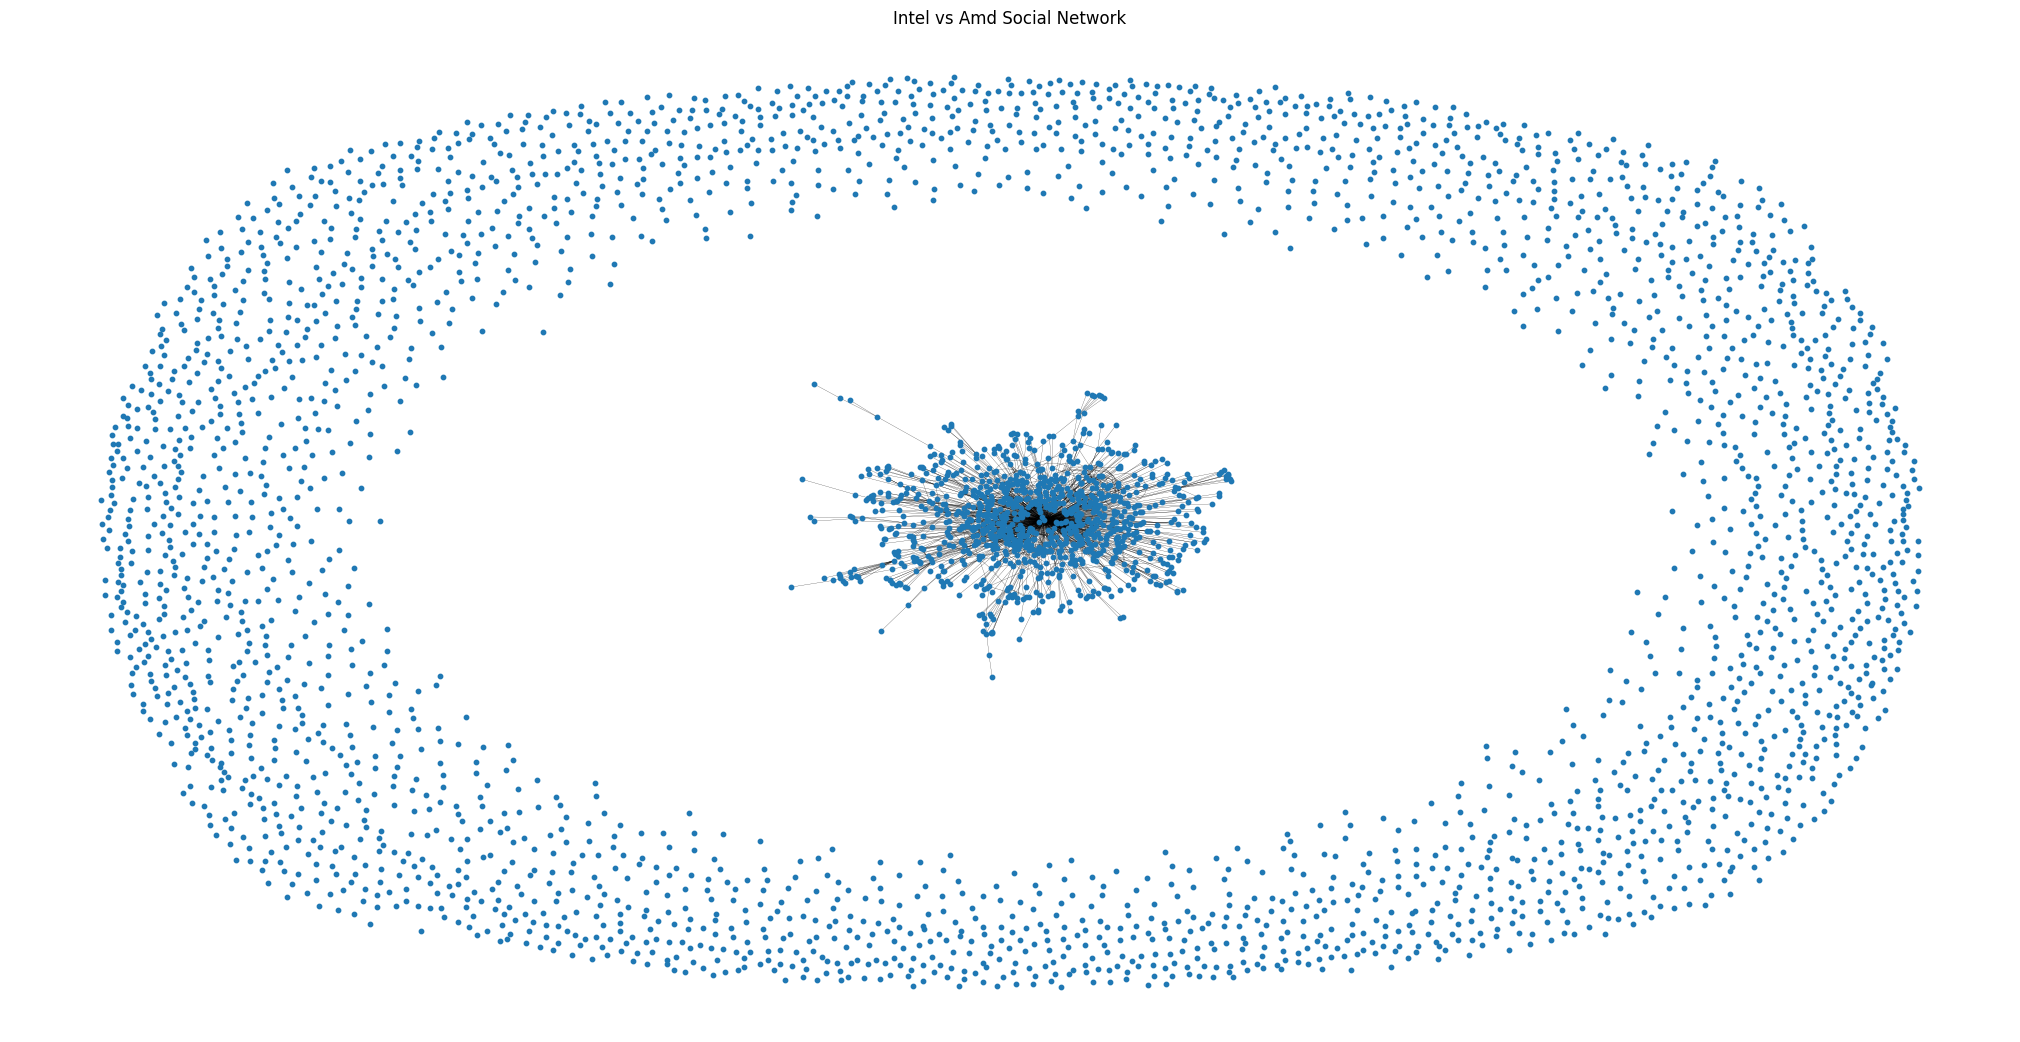

In [ ]:
#Graph of All Social Network
layout = nx.spring_layout(G, iterations=20, seed=11)
options = {"node_size":10, "with_labels":False, "width":0.15}
plt.figure(figsize=(20, 10))
nx.draw(G, pos=layout, **options)
plt.title("Intel vs Amd Social Network")
plt.show()

From the graph above, we could see that there are many users that has no edge. This happend due to they have no interaction with any users in the comment section

In [ ]:
#Removing Nodes without any Edge
G.remove_nodes_from([node for node, degree in G.degree() if degree < 1])

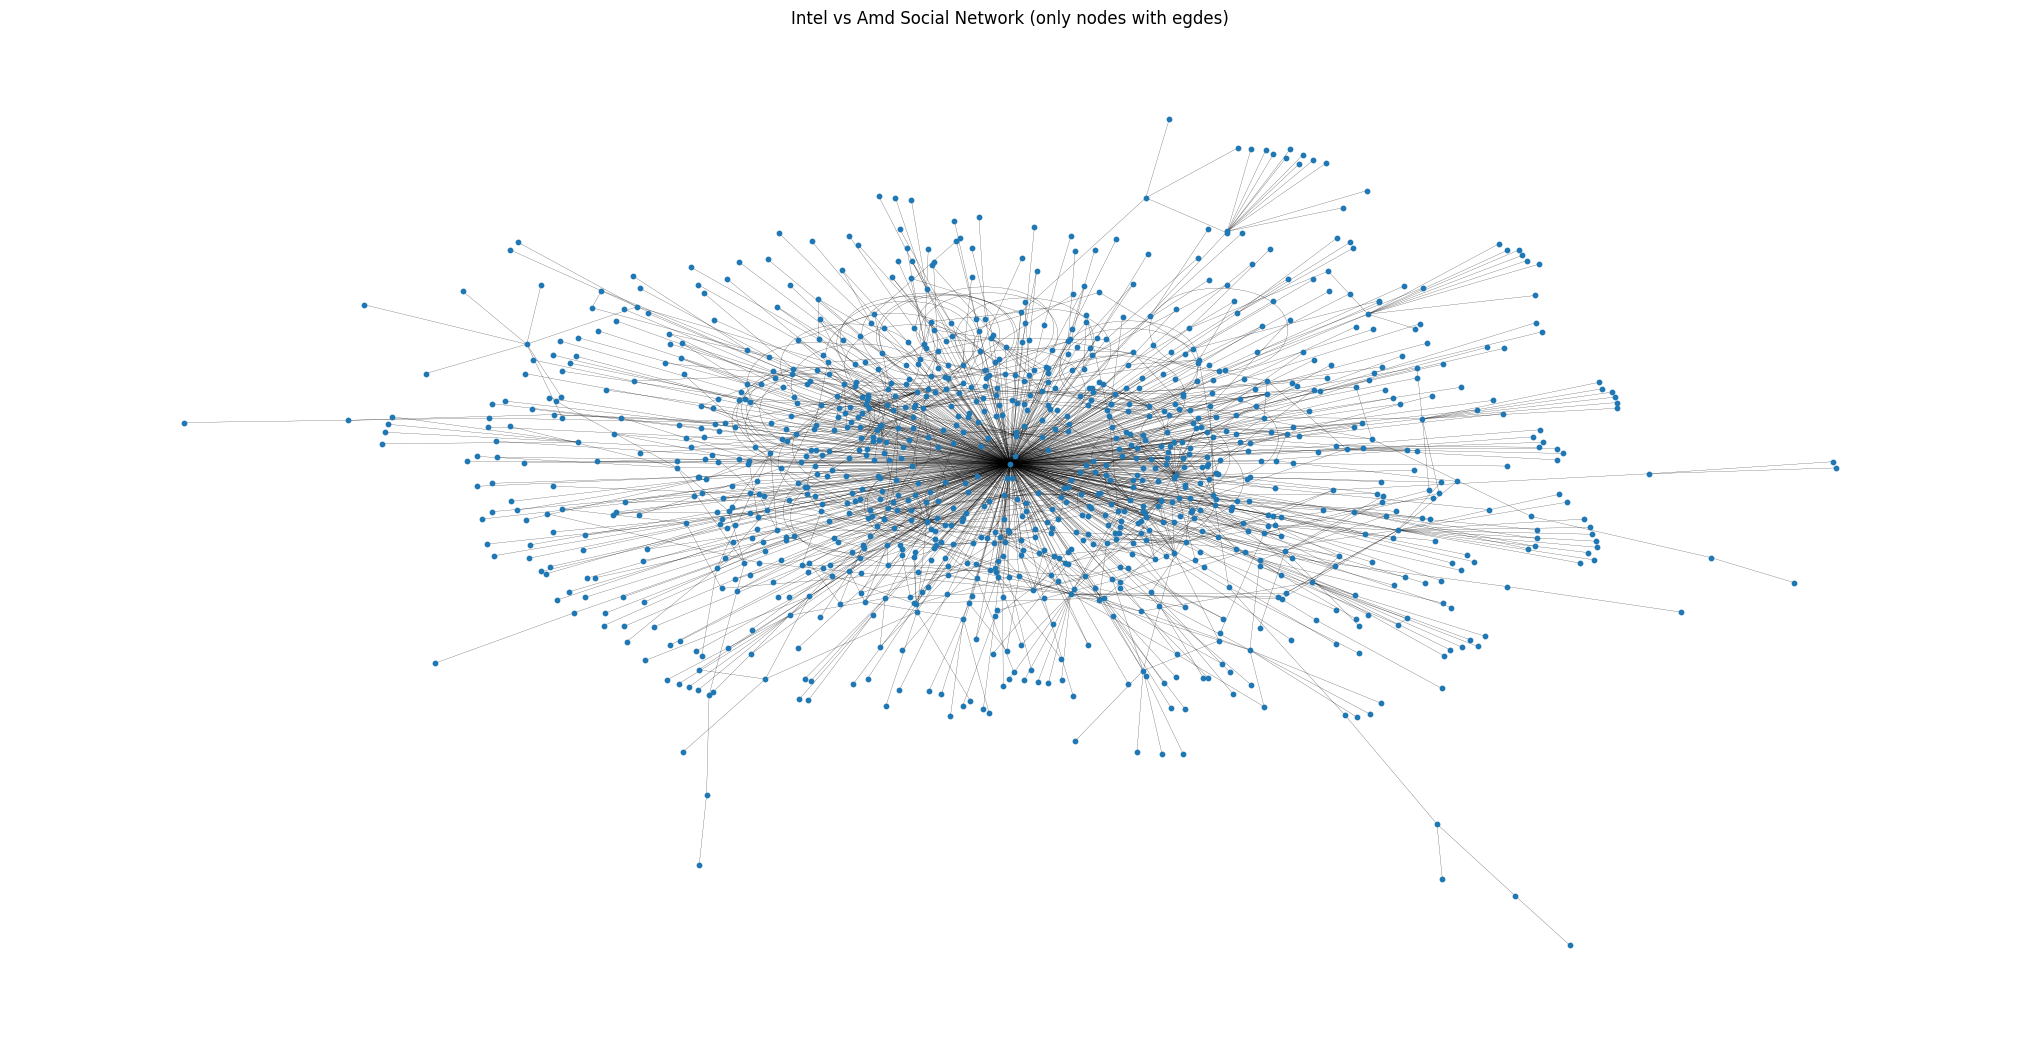

In [ ]:
#Graph of Social Network only Containing Nodes with Edges
layout = nx.spring_layout(G, iterations=20, seed=11)
options = {"node_size":10, "with_labels":False, "width":0.15}
plt.figure(figsize=(20, 10))
nx.draw(G, pos=layout, **options)
plt.title("Intel vs Amd Social Network (only nodes with egdes)")
plt.show()

In [ ]:
print("Total Comments : ", len(df))
print("Total Users : ", len(autUn))
print("Total Nodes : ",len(G.nodes))
print("Total Edges : ", len(G.edges))

Total Comments :  4956
Total Users :  4081
Total Nodes :  1090
Total Edges :  1705


# Centrality Calculation

In [ ]:
#Betweennes Centrality Calculation
betweenness_centrality = nx.betweenness_centrality(G)
dfCent = pd.DataFrame({'betweenness centrality': betweenness_centrality}).reset_index()
dfCent.columns = ['Username', 'betweenness centrality']

#Sort DataFrame Descendingly by the Value of Centrality
dfCent.sort_values(['betweenness centrality'],inplace=True,ascending=False)
dfCent.drop([0],inplace=True)


In [ ]:
dfCent.head()

,Username,betweenness centrality
188,Dae,0.027257
421,Jordan,0.023289
923,bookedsam,0.020109
954,dylan neff,0.016434
190,Daily Corvid,0.015556


In [ ]:
#Comments of the User with the Highest Centrality Value
df.loc[df['author'] == 'Dae']

,id,date,author,text,type,author_channel_url,author_channel_id,edited_date,parent_post_id,parent_username,direct_reply_to,likes
4601,9imgCkTHZq29ioBGuI_F1e,2022-11-24T09:30:23Z,Dae,@Justin that's 2 gens,Reply,http://www.youtube.com/channel/UCz-4tnoKX6y5Oh...,UCz-4tnoKX6y5OhqBYFOT7FA,2022-11-24T09:30:23Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Justin,0
4602,9imgCkTHZq29ioBET-kPhb,2022-11-24T09:30:03Z,Dae,"@J S video is about a 7950x, how is it made up...",Reply,http://www.youtube.com/channel/UCz-4tnoKX6y5Oh...,UCz-4tnoKX6y5OhqBYFOT7FA,2022-11-24T09:30:03Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,NaN,0
4671,9imgCkTHZq29imldo5T1bS,2022-11-23T20:18:28Z,Dae,It's a 7950x what are you going to upgrade too...,Reply,http://www.youtube.com/channel/UCz-4tnoKX6y5Oh...,UCz-4tnoKX6y5OhqBYFOT7FA,2022-11-23T20:18:28Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,NaN,43


In [ ]:
#Comments of Users Mentioning User with the Highest Centrality Value
df.loc[df['direct_reply_to'] == 'Dae']

,id,date,author,text,type,author_channel_url,author_channel_id,edited_date,parent_post_id,parent_username,direct_reply_to,likes
4596,9imgCkTHZq29rJuxT5un5J,2023-06-23T22:45:08Z,Lonnie Beal,"@Dae It's not just AMD, Intel fanclowns do the...",Reply,http://www.youtube.com/channel/UCdnuBe3sjkmliw...,UCdnuBe3sjkmliwNXiEt55RA,2023-06-23T22:45:08Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,0
4607,9imgCkTHZq29inD3wVIxpv,2022-11-24T00:26:51Z,Gabriel Marinello,@Dae The CPU doesn't magically disappear. You ...,Reply,http://www.youtube.com/channel/UC3z1JjlQbp8lrB...,UC3z1JjlQbp8lrBJrvFED3IA,2022-11-24T00:26:51Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,0
4611,9imgCkTHZq29in8h2gYf6p,2022-11-23T23:48:38Z,Mart Heunen,@Dae Your refernce is to the video's setup. Ma...,Reply,http://www.youtube.com/channel/UChZl5aVIPF-lrf...,UChZl5aVIPF-lrfajD1QmgUA,2022-11-23T23:48:38Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,0
4622,9imgCkTHZq29in4K3ePrSW,2022-11-23T23:10:24Z,Angel Aizen,@Dae lets say that 2 people (one with an amd c...,Reply,http://www.youtube.com/channel/UCGKhYe-dWMb7qJ...,UCGKhYe-dWMb7qJnHmFIsblg,2022-11-23T23:10:24Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,1
4634,9imgCkTHZq29imziTUIgP4,2022-11-23T22:21:26Z,Espi,"@Dae Well, its good AM4 had 5 gens then, it re...",Reply,http://www.youtube.com/channel/UCOa7NYHa1ug0UU...,UCOa7NYHa1ug0UULn0AAD1Ug,2022-11-23T22:21:26Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,0
4642,9imgCkTHZq29imwipEV57Z,2022-11-23T21:55:17Z,Lay Yard,@Dae Intel d Rider said some stupid thing that...,Reply,http://www.youtube.com/channel/UCpJ9MnOzKMPCuy...,UCpJ9MnOzKMPCuy4cm3ZPluA,2022-11-23T21:55:17Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,1
4648,9imgCkTHZq29imvHWjJKyH,2022-11-23T21:42:41Z,Horsti Δ,@Dae bro... I had 4 different AMD cpus in the ...,Reply,http://www.youtube.com/channel/UCT8QCkRHfxjCf8...,UCT8QCkRHfxjCf8ff_MEu8Iw,2022-11-23T21:42:41Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,2
4649,9imgCkTHZq29imv0nRaKPU,2022-11-23T21:40:24Z,xyr3s,@Dae what about the 13950x? :p,Reply,http://www.youtube.com/channel/UCxNz4PSrSOtq17...,UCxNz4PSrSOtq17cqQ_JDBDg,2022-11-23T21:40:24Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,0
4652,9imgCkTHZq29imu1fYDK7Q,2022-11-23T21:31:46Z,Generic Gamer,@Dae I went from a 1600x to a 5600x on my brot...,Reply,http://www.youtube.com/channel/UCkHpySQS0Str3q...,UCkHpySQS0Str3q66z7zmSDw,2022-11-23T21:31:46Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,0
4653,9imgCkTHZq29imt31q-z-b,2022-11-23T21:23:13Z,Ratan Venkatesan,"@Dae Nope, it's much more than just that. Vcac...",Reply,http://www.youtube.com/channel/UC1jFOeNQELdwEP...,UC1jFOeNQELdwEPrky85W8Hw,2022-11-23T21:23:13Z,UgygVVF8Im00z8G3jpJ4AaABAg,Matthew Ferguson,Dae,5


We could see, even though Jordan tops the charts above in the EDA sections, doesn't guarantee he will be the most influential users.

Whereas Dae, even though he only got third place in the mentions chart, matter of fact, he never became a parent comment. But he could become the most influential user.


This happend because of the comments he posted. If you analyze the comments of those who mentioned him, you could see most of them are contradictive messages. This serves him as a "mediator" for others to be involved in the topic he started.